In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#Importamos las carpetas con images como zip
from google.colab import files
archivo_angry = files.upload()
archivo_happy = files.upload()
archivo_sad = files.upload()


Saving Angry.zip to Angry (3).zip


Saving happy.zip to happy (1).zip


Saving Other.zip to Other (1).zip


Saving Sad.zip to Sad.zip


In [17]:

import zipfile
import os

#Descomprimimos los archivos zip dentro de la carpeta content

ruta_destino_colab = "/content/"

# Descomprimir el archivo zip de "Angry"
with zipfile.ZipFile(next(iter(archivo_angry)), 'r') as zip_ref:
    zip_ref.extractall(os.path.join(ruta_destino_colab)) #Si pongo os.path.join(ruta_destino_colab,"Angry") creo una carpeta dentro de content que se llama "Angry" y ahi descomprimo

# Descomprimir el archivo zip de "Happy"
with zipfile.ZipFile(next(iter(archivo_happy)), 'r') as zip_ref:
    zip_ref.extractall(os.path.join(ruta_destino_colab))

# Descomprimir el archivo zip de "Other"
with zipfile.ZipFile(next(iter(archivo_other)), 'r') as zip_ref:
    zip_ref.extractall(os.path.join(ruta_destino_colab))

# Descomprimir el archivo zip de "Sad"
with zipfile.ZipFile(next(iter(archivo_sad)), 'r') as zip_ref:
    zip_ref.extractall(os.path.join(ruta_destino_colab))

In [48]:
import os
#Verificamos los archivos que hay dentro de content

current_directory = os.getcwd()
print("Directorio actual:", current_directory)

files_in_directory = os.listdir(current_directory)
print("Archivos en el directorio:", files_in_directory)

Directorio actual: /content
Archivos en el directorio: ['.config', 'happy', 'Angry.zip', 'Other.zip', 'Other (1).zip', 'Other', 'Angry (3).zip', 'Angry (2).zip', 'happy (1).zip', 'happy.zip', 'Sad', 'Sad.zip', 'facial_expression_model.h5', 'Angry (1).zip', 'Angry', 'sample_data']


In [19]:
# Rutas de las carpetas descomprimidas
angry_folder = "/content/Angry"  # Cambia esto a la ruta correcta
happy_folder = "/content/happy"  # Cambia esto a la ruta correcta
ruta_other = "/content/Other"  # Cambia esto a la ruta correcta
sad_folder = "/content/Sad"  # Cambia esto a la ruta correcta





In [20]:
os.listdir(sad_folder)

['ib1vx-6XfB8.jpg',
 '5263884.jpg',
 '-81lVsfM4gQ.jpg',
 '_FcsV9SvAD8.jpg',
 'vwF5tYeEvKo.jpg',
 '1938123.jpg',
 'QIvp_J8mzFk.jpg',
 'pKnpMFEf50Y.jpg',
 '236606.jpg',
 'xUucsS41NOk.jpg',
 '6aY_0S-epZQ.jpg',
 'XSLGNupDFZg.jpg',
 'xtaeK_kHTNo.jpg',
 '56733.jpg',
 '16298424.jpg',
 'CfDAo3C3bvQ.jpg',
 'U0Qk2Qb1BrU.jpg',
 '6GMq7AGxNbE.jpg',
 '59965.jpg',
 '1643457.jpg',
 '3198006.jpg',
 '8gOu6m_tj-0.jpg',
 '1300342.jpg',
 'uy5l-VJ8dRM.jpg',
 '17099644.jpg',
 'xgTMSz6kegE.jpg',
 '4-pkwmwhdis.jpg',
 '17081969.jpg',
 'ATLRPV_8kVg.jpg',
 '2252316.jpg',
 'Ty8nxayxYkk.jpg',
 '3IY5rkXimmk.jpg',
 'oB2CsiQ8ntc.jpg',
 '14555653.jpg',
 '3671300.jpg',
 '2255565.jpg',
 '33287.jpg',
 '17060326.jpg',
 'e9ZJpC8P0UY.jpg',
 'ZKLsj6xruAk.jpg',
 'Tfpe5Tdc8LE.jpg',
 '6342314.jpg',
 '2113332.jpg',
 '53261.jpg',
 '850602.jpg',
 '1909802.jpg',
 'WACbMTEGiCw.jpg',
 '2248516.jpg',
 'sssxyuZape8.jpg',
 '3198000.jpg',
 'W-jOy3QrPdg.jpg',
 'TkwzP_frzl4.jpg',
 '0nTKEmrsEn8.jpg',
 'ZgjsNQ-1j1M.jpg',
 'usTb7ZMa6QI.jpg',
 

In [21]:
import cv2

#Creamos una funcion para cargar las imagenes como listas

# Function to load and preprocess images
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (48, 48))  # Resize to a fixed size for the model
            images.append(img)
    return images

In [22]:

#Aplicamos la funcion a las carpetas de imagenes
happy_images = load_images_from_folder(happy_folder)
sad_images = load_images_from_folder(sad_folder)
angry_images = load_images_from_folder(angry_folder)

happy_images

[array([[179, 172, 173, ..., 215, 216, 181],
        [179, 185, 188, ..., 213, 212, 188],
        [182, 201, 203, ..., 215, 209, 192],
        ...,
        [ 45,  54,  55, ..., 221, 199, 183],
        [ 59,  56,  58, ..., 213, 186, 192],
        [ 65,  56,  54, ..., 230, 182, 157]], dtype=uint8),
 array([[177, 153, 117, ..., 133, 165, 185],
        [173, 158, 155, ..., 141, 111, 121],
        [166, 167, 172, ..., 112,  81,  80],
        ...,
        [189, 166, 184, ...,  27,  28,  29],
        [189, 159, 188, ...,  19,  25,  19],
        [173, 137, 176, ...,  16,  23,  22]], dtype=uint8),
 array([[106, 155, 188, ...,   2,   5,  30],
        [ 87, 144, 162, ...,   3,   6,   9],
        [ 79, 147, 169, ...,   3,   4,  64],
        ...,
        [133, 198, 195, ...,  31,  29,  30],
        [130, 203, 202, ...,  24,  23,  23],
        [121, 210, 211, ..., 148, 150, 156]], dtype=uint8),
 array([[179, 171, 164, ..., 156, 202, 199],
        [180, 171, 166, ..., 113, 202, 200],
        [182, 17

In [23]:
#creamos labels para cada categoria

happy_labels = [0] * len(happy_images)
sad_labels = [1] * len(sad_images)
angry_labels = [2] * len(angry_images)



In [24]:
#Concatenamos imagenes y labels
X = np.array(happy_images + sad_images + angry_images)
y = np.array(happy_labels + sad_labels + angry_labels)

In [25]:
#Normalizamos los valores de los pixel de las imagenes a valores entre 0 y 1

X = X.astype('float32') / 255.0

In [26]:
#convertimos las variables categoricas en variables One-hot

from keras.utils import np_utils

y = np_utils.to_categorical(y, 3)

y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [40]:
#Dividimos el dataset en Train y Test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape

(248, 48, 48)

# **MODELO CNN**

In [29]:
#Contruimos el Modelo CNN

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1))) #input_shape=(48, 48, 1) hace referencia a 48x48 pixels y en escala de grises

model.add(BatchNormalization()) #Esta normalizacion reduce el cambio covariante interno

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2))) #reduce las dimensiones espaciales de los datos y ayuda a reducir el cálculo

model.add(Dropout(0.25)) #desactiva aleatoriamente el 25% de las salidas de las neuronas durante el entrenamiento para evitar el sobreajuste

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) #aplana la salida 3D de las capas convolucionales anteriores en un vector 1D preparando para las capas Dense

model.add(Dense(512, activation='relu')) #Son capas completamente conectadas
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax')) #activación softmax para convertir las puntuaciones brutas en probabilidades de clase #Capa densa de salidad con 3 unidades de salida

print(model.summary())

# Compilamos el modele con class weights
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 46, 46, 64)        640       
                                                                 
 batch_normalization_3 (Batc  (None, 46, 46, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 44, 44, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 22, 22, 64)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 20, 20, 128)      

In [30]:
#Calculamos class weights

#Total  de filas del data set de entrenamiento

total_samples = len(y_train)

total_samples

248

In [37]:
#Calcula la cantidad de filas de cada categoria

print(np.sum(y_train[:, 0]))
print(np.sum(y_train[:, 1]))
print(np.sum(y_train[:, 2]))


87.0
84.0
77.0


In [38]:
#Calcula el peso de cada categoria

class_weights = {0: total_samples / np.sum(y_train[:, 0]),
                 1: total_samples / np.sum(y_train[:, 1]),
                 2: total_samples / np.sum(y_train[:, 2])}
class_weights

{0: 2.8505747126436782, 1: 2.9523809523809526, 2: 3.220779220779221}

In [43]:
#Entrenamos el modelo con el peso de cada categoria

history = model.fit(X_train.reshape(-1, 48, 48, 1), #En este caso, se cambia la forma del conjunto de datos a una matriz 4D
                    y_train,
                    batch_size=32, #tamaño del lote o batch que se utilizará durante el entrenamiento
                    epochs=100,
                    validation_split=0.1, #proporción de datos que se utilizarán como conjunto de validación
                    class_weight=class_weights, #se refiere a los pesos de clase que se pueden usar para manejar problemas de desequilibrio de clases
                    verbose=0) #no se mostrará ninguna salida durante el entrenamiento



In [44]:
# Evaluamos el modelo en la data de entrenamiento y de prueba
loss, accuracy = model.evaluate(X_test.reshape(-1, 48, 48, 1), y_test)
losstr, accuracytr = model.evaluate(X_train.reshape(-1, 48, 48, 1), y_train)

8/8 [==============================] - 2s 203ms/step - loss: 0.3962 - accuracy: 0.9315


In [49]:
# Guardamos el modelo
model.save("facial_expression_model.h5")



In [50]:
from google.colab import files
files.download('/content/facial_expression_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
print(f"Test accuracy: {accuracy*100:.2f}%")
print(f"Train accuracy: {accuracytr*100:.2f}%")

Test accuracy: 28.57%
Train accuracy: 93.15%


#**TESTEO DEL MODELO**

In [47]:
from keras.models import load_model
#importamos el modelo
loaded_model = load_model("facial_expression_model.h5")

In [52]:
#Importo la foto de prueba a google colab
from google.colab import files
photo_test = files.upload()

Saving 2499282.jpg to 2499282.jpg


In [55]:
current_directory = os.getcwd()
print("Directorio actual:", current_directory)
files_in_directory = os.listdir(current_directory)
print("Archivos en el directorio:", files_in_directory)

Directorio actual: /content
Archivos en el directorio: ['.config', 'happy', 'Angry.zip', 'Other.zip', 'Other (1).zip', 'Other', 'Angry (3).zip', 'Angry (2).zip', 'happy (1).zip', '2499282.jpg', 'happy.zip', 'Sad', 'Sad.zip', 'facial_expression_model.h5', 'Angry (1).zip', 'Angry', 'sample_data']


In [56]:
#Creo una variable con la foto
custom_test_image_path = "/content/2499282.jpg"

In [58]:
#Preprocesamiento de la foto para aplicar el modelo

custom_test_image = cv2.imread(custom_test_image_path)
custom_test_image = cv2.cvtColor(custom_test_image, cv2.COLOR_BGR2GRAY)
custom_test_image = cv2.resize(custom_test_image, (48, 48))
custom_test_image = custom_test_image.astype('float32') / 255.0

custom_test_image

array([[0.93333334, 0.9254902 , 0.92156863, ..., 0.8392157 , 0.7647059 ,
        0.6039216 ],
       [0.93333334, 0.9254902 , 0.92156863, ..., 0.8352941 , 0.7529412 ,
        0.5803922 ],
       [0.92941177, 0.9254902 , 0.9137255 , ..., 0.83137256, 0.7490196 ,
        0.5647059 ],
       ...,
       [0.54901963, 0.6509804 , 0.5647059 , ..., 0.39215687, 0.39607844,
        0.3137255 ],
       [0.5803922 , 0.5803922 , 0.5058824 , ..., 0.45882353, 0.39607844,
        0.34117648],
       [0.6392157 , 0.53333336, 0.5137255 , ..., 0.3764706 , 0.47843137,
        0.34117648]], dtype=float32)

In [59]:
# Reshape the image to match the model input shape

custom_test_image = np.expand_dims(custom_test_image, axis=0)#agrega una nueva dimensión al principio para obtener una matriz (1, n, m)
custom_test_image = np.expand_dims(custom_test_image, axis=-1) # se agrega otra dimensión al final (1, n, m, 1) denotando que se trabaja con grises (canal de color)



In [60]:
#Hacemos la prediccion
prediction = loaded_model.predict(custom_test_image)
prediction

1/1 [==============================] - 0s 201ms/step


array([[0.00675066, 0.85274595, 0.14050344]], dtype=float32)

In [62]:
prediction_prob = prediction[0]
prediction_prob

array([0.00675066, 0.85274595, 0.14050344], dtype=float32)

In [63]:
#Obtenemos el maximo valor del array que se presenta como el mas probable
emotion_label = np.argmax(prediction[0])
emotion_label

1

In [64]:
# Map del emotion label
emotion_classes = {0: 'happy', 1: 'sad', 2: 'angry'}
predicted_emotion = emotion_classes[emotion_label]

predicted_emotion

'sad'

In [66]:
# Print del label de la imagen de prueba y las probabilidades de cada uno
print(f"Predicted Emotion: {predicted_emotion}")
print(f"Confidence [happy, sad, angry]: {prediction_prob}")

Predicted Emotion: sad
Confidence [happy, sad, angry]: [0.00675066 0.85274595 0.14050344]


PLOT

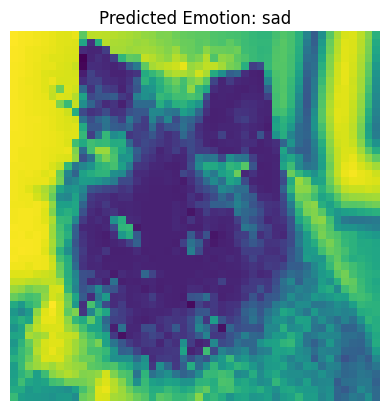

In [70]:
import matplotlib.pyplot as plt

plt.imshow(custom_test_image[0, :, :, 0]) #Antes de plotear le aliminamos las dos dimensiones creadas anteriormente

plt.title(f"Predicted Emotion: {predicted_emotion}")

plt.axis('off')

plt.show()

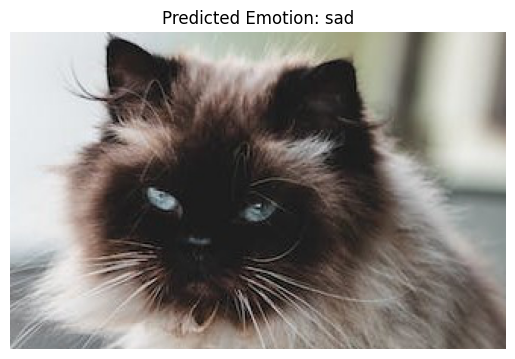

In [73]:
from PIL import Image

img_pil = Image.open(custom_test_image_path)
plt.imshow(np.array(img_pil))
plt.title(f"Predicted Emotion: {predicted_emotion}")
plt.axis('off')  # Hide axes
plt.show()

# **HIPERPARAMTER TUNING**

In [74]:


# Function to create and compile the CNN model
def create_cnn_model(conv_filters_1=64, conv_filters_2=128, dense_units=512, dropout_rate=0.5):
  model = Sequential()
  model.add(Conv2D(conv_filters_1, (3, 3), activation='relu', input_shape=(48, 48, 1)))
  model.add(Conv2D(conv_filters_1, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(dropout_rate))

  model.add(Conv2D(conv_filters_2, (3, 3), activation='relu'))
  model.add(Conv2D(conv_filters_2, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(dropout_rate))

  model.add(Flatten())
  model.add(Dense(dense_units, activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(3, activation='softmax'))

# Compile the model with categorical_crossentropy loss
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [75]:
from keras.wrappers.scikit_learn import KerasClassifier
# Convertimos un modelo de Keras en un estimador de scikit-learn para poder hacer la busqueda de hiperparametros
cnn_model = KerasClassifier(build_fn=create_cnn_model, epochs=10, batch_size=64, verbose=1)

<ipython-input-75-b67895bd5aee>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  cnn_model = KerasClassifier(build_fn=create_cnn_model, epochs=10, batch_size=64, verbose=1)


In [76]:
# Define the la grila de parametros a buscar
param_grid = {
    'conv_filters_1': [32, 64, 128],
    'conv_filters_2': [64, 128, 256],
    'dense_units': [256, 512, 1024],
    'dropout_rate': [0.25, 0.5, 0.75]
}

In [77]:
# Creamos el objeto RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(cnn_model, param_distributions=param_grid, n_iter=10, cv=3, verbose=1, random_state=42)

# Entrenamos el RandomizedSearchCV con la data de entrenamiento
random_search_result = random_search.fit(X_train.reshape(-1, 48, 48, 1), y_train)

# Print the best hyperparameters found
print("Best Parameters:", random_search_result.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/10
3/3 [==============================] - 4s 596ms/step - loss: 1.2426 - accuracy: 0.3152
Epoch 2/10
3/3 [==============================] - 2s 573ms/step - loss: 1.1005 - accuracy: 0.3152
Epoch 3/10
3/3 [==============================] - 2s 869ms/step - loss: 1.0945 - accuracy: 0.3273
Epoch 4/10
3/3 [==============================] - 2s 585ms/step - loss: 1.0932 - accuracy: 0.3697
Epoch 5/10
3/3 [==============================] - 2s 584ms/step - loss: 1.0902 - accuracy: 0.3697
Epoch 6/10
3/3 [==============================] - 2s 584ms/step - loss: 1.0879 - accuracy: 0.3636
Epoch 7/10
3/3 [==============================] - 2s 596ms/step - loss: 1.0883 - accuracy: 0.3939
Epoch 8/10
3/3 [==============================] - 2s 595ms/step - loss: 1.0836 - accuracy: 0.4182
Epoch 9/10
3/3 [==============================] - 3s 944ms/step - loss: 1.0775 - accuracy: 0.4303
Epoch 10/10
2/2 [==============================] - 0s 60m

2/2 [==============================] - 0s 31ms/step - loss: 1.0846 - accuracy: 0.3614
Epoch 1/10
3/3 [==============================] - 2s 315ms/step - loss: 1.1363 - accuracy: 0.3030
Epoch 2/10
3/3 [==============================] - 1s 397ms/step - loss: 1.0978 - accuracy: 0.3697
Epoch 3/10
3/3 [==============================] - 1s 298ms/step - loss: 1.0996 - accuracy: 0.3273
Epoch 4/10
3/3 [==============================] - 1s 292ms/step - loss: 1.0971 - accuracy: 0.3455
Epoch 5/10
3/3 [==============================] - 1s 290ms/step - loss: 1.0949 - accuracy: 0.3879
Epoch 6/10
3/3 [==============================] - 1s 291ms/step - loss: 1.0920 - accuracy: 0.3455
Epoch 7/10
3/3 [==============================] - 1s 299ms/step - loss: 1.0894 - accuracy: 0.3455
Epoch 8/10
3/3 [==============================] - 1s 286ms/step - loss: 1.0847 - accuracy: 0.3697
Epoch 9/10
3/3 [==============================] - 1s 287ms/step - loss: 1.0765 - accuracy: 0.3818
Epoch 10/10
3/3 [===============

2/2 [==============================] - 0s 29ms/step - loss: 1.0775 - accuracy: 0.4096
Epoch 1/10
3/3 [==============================] - 2s 431ms/step - loss: 1.1211 - accuracy: 0.3253
Epoch 2/10
3/3 [==============================] - 1s 312ms/step - loss: 1.0957 - accuracy: 0.3494
Epoch 3/10
3/3 [==============================] - 1s 290ms/step - loss: 1.1019 - accuracy: 0.3614
Epoch 4/10
3/3 [==============================] - 1s 285ms/step - loss: 1.0879 - accuracy: 0.3855
Epoch 5/10
3/3 [==============================] - 1s 290ms/step - loss: 1.0835 - accuracy: 0.3554
Epoch 6/10
3/3 [==============================] - 1s 286ms/step - loss: 1.0726 - accuracy: 0.3735
Epoch 7/10
3/3 [==============================] - 1s 292ms/step - loss: 1.0504 - accuracy: 0.4398
Epoch 8/10
3/3 [==============================] - 1s 294ms/step - loss: 1.0262 - accuracy: 0.4819
Epoch 9/10
3/3 [==============================] - 1s 289ms/step - loss: 1.0337 - accuracy: 0.4880
Epoch 10/10
2/2 [===============

In [78]:
# guardamos the best model
best_model = random_search_result.best_estimator_

In [79]:
#Evaluamos el best model en el data test

loss, accuracy = best_model.model.evaluate(X_test.reshape(-1, 48, 48, 1), y_test)
print(f"Test accuracy of the best model: {accuracy*100:.2f}%")

2/2 [==============================] - 0s 91ms/step - loss: 1.0818 - accuracy: 0.2698
Test accuracy of the best model: 26.98%
